<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
    Artificial Intelligence <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 4 - Machine Learning - Classification <br>
<font color=0CBCDF size=4>
   &#x1F335; Amirhossein Akbari  &#x1F335;
</div>

____

<font color=9999FF size=4>
&#x1F388; Full Name : Arian Noori
<br>
<font color=9999FF size=4>
&#x1F388; Student Number : 401106663

<font color=0080FF size=3>
This Jupyter Notebook is dedicated to exploring a classification task focused on predicting traveler satisfaction levels with airline services. In our scenario, we aim to classify whether a passenger is satisfied or not based on various features related to their travel experience. To tackle this task, we will develop and compare three different machine learning models:
</font>
<br>

1. **Naive Bayes Classifier**: <font color=66B2FF size=2>We'll start by implementing a Naive Bayes classifier without the use of high-level libraries, understanding its mechanics and applying it to our dataset.</font>

2. **Decision Tree Classifier**: <font color=66B2FF size=2>Next, we will build a Decision Tree model from the ground up, enabling us to delve into how decisions are made and splits are performed based on the data.</font>

<font color=0080FF size=3>
For each model, we'll go through the process of data preprocessing, model training, and evaluation to compare their performance. By the end of this notebook, you should have a clear understanding of these models' workings and their effectiveness in predicting airline passenger satisfaction.
</font>

1. <font color=red size=3>**Run All Cells Before Submission**</font>: <font color=FF99CC size=2>Before saving and submitting your notebook, please ensure you run all cells from start to finish. This practice guarantees that your notebook is self-consistent and can be evaluated correctly by others.</font>

2. <font color=red size=3>**Model Evaluation and Scoring Criteria**</font>: <font color=FF99CC size=2>To receive full marks for a model implementation, the accuracy of your custom model must be within 5 percentage points of the corresponding scikit-learn model's accuracy. Should your model's accuracy fall more than <mark>5 percentage</mark> points below that of the scikit-learn model, or if the scikit-learn model's accuracy is below 80%, points will be deducted accordingly.</font>

<font color=#ffb578 size=3>
you are free to modify, add, or remove any cells as you see fit to complete your tasks. Feel free to change any of the provided code or content to better suit your understanding and approach to the problems.

- **Questions**: If you have any questions or require clarifications as you work through the notebook, please do not hesitate to ask. You can post your queries on Quera or reach out via Telegram.
- **Feedback**: We encourage you to seek feedback and engage in discussions to enhance your learning experience and improve your solutions.
</font>

Importing necessary libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

Before proceeding, please execute the cell below to download the dataset if you're using Kaggle or Colab; if running locally, utilize the dataset in the 'HW' folder.

In [2]:
current_path = os.getcwd()
data_url = "https://www.dropbox.com/scl/fi/75xu0qz933plnpid1uplz/AI-HW4-Q2-Data.csv?rlkey=47o5ksm1qyoabswahequk7t1d&dl=0"
data_path = os.path.join(current_path, "data.csv")
!wget -q -O "{data_path}" "{data_url}"

# Data Exploration (5 point)
In this section, we perform some data exploration to get a better understanding of the data.

## Task1: Load and Inspect the Dataset (2 point)
Load the train dataset as a dataframe and show the first 10 rows of the dataframe

In [3]:
df = pd.read_csv(data_path)

df.head(10)

,Customer Type,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Online boarding,Seat comfort,Inflight entertainment,satisfaction
0,Loyal Customer,Business travel,Business,1727,1,1,4,5,5,satisfied
1,Loyal Customer,Personal Travel,Eco,1546,3,3,3,2,2,neutral or dissatisfied
2,disloyal Customer,Business travel,Eco,1086,5,5,5,1,1,satisfied
3,Loyal Customer,Business travel,Business,2644,2,5,4,3,2,neutral or dissatisfied
4,Loyal Customer,Business travel,Eco,302,4,1,3,4,4,neutral or dissatisfied
5,Loyal Customer,Business travel,Eco,125,5,2,5,5,5,satisfied
6,Loyal Customer,Business travel,Business,248,3,3,5,5,5,satisfied
7,disloyal Customer,Business travel,Eco,547,2,2,2,1,1,neutral or dissatisfied
8,Loyal Customer,Business travel,Eco Plus,472,4,1,4,4,4,satisfied
9,Loyal Customer,Business travel,Business,2875,2,4,4,4,5,satisfied


## Task 2: Dataset Overview (4 point)
Perform an initial exploration of the dataset to understand its structure, including the number of features, rows, and the types of data (numerical or categorical) it contains. Use methods like [.info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) and [.describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) for this purpose.

In [4]:
print(df.shape)
print(df.info())
display(df.describe())

(25000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Customer Type           25000 non-null  object
 1   Type of Travel          25000 non-null  object
 2   Class                   25000 non-null  object
 3   Flight Distance         25000 non-null  int64 
 4   Inflight wifi service   25000 non-null  int64 
 5   Ease of Online booking  25000 non-null  int64 
 6   Online boarding         25000 non-null  int64 
 7   Seat comfort            25000 non-null  int64 
 8   Inflight entertainment  25000 non-null  int64 
 9   satisfaction            25000 non-null  object
dtypes: int64(6), object(4)
memory usage: 1.9+ MB
None


,Flight Distance,Inflight wifi service,Ease of Online booking,Online boarding,Seat comfort,Inflight entertainment
count,25000.0000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,1226.2498,2.777720,2.783000,3.336360,3.507480,3.438440
std,1015.8702,1.366626,1.421208,1.356442,1.310608,1.319955
min,31.0000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,423.0000,2.000000,2.000000,2.000000,3.000000,2.000000
50%,867.0000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1805.5000,4.000000,4.000000,4.000000,5.000000,5.000000
max,4983.0000,5.000000,5.000000,5.000000,5.000000,5.000000


## Task 3: Distribution and Analysis (4 point)
Visualize the distribution of both numerical and categorical features in the dataset using [histograms](https://matplotlib.org/stable/gallery/statistics/hist.html) for numerical data and [bar charts](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) for categorical data. Analyze these distributions to identify any patterns, outliers, or anomalies in the data.

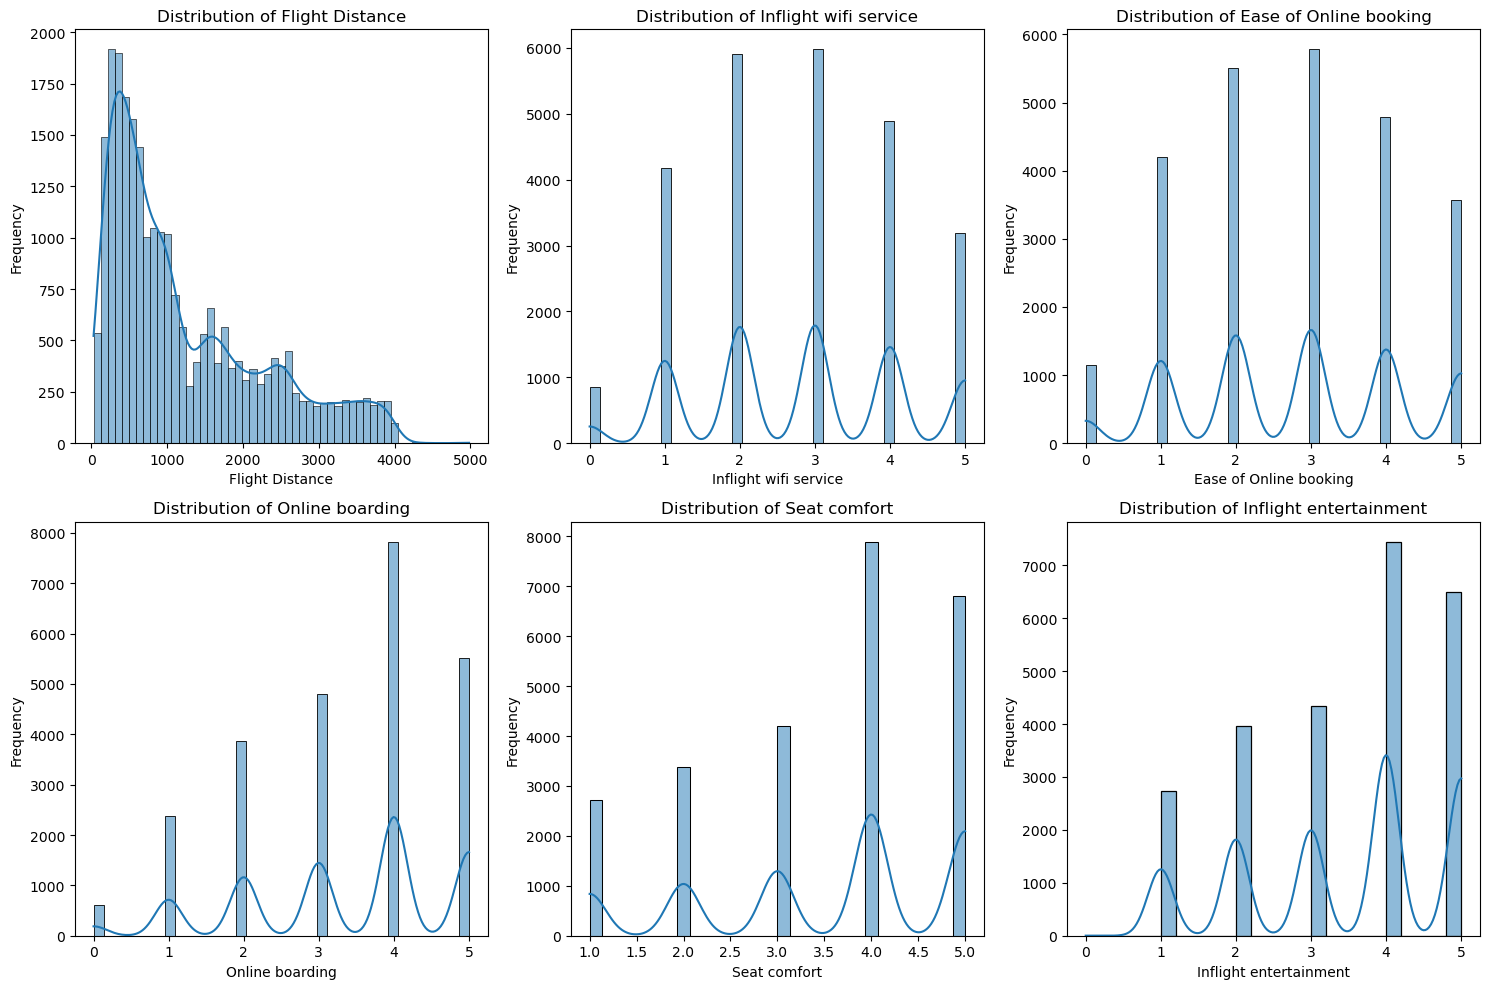

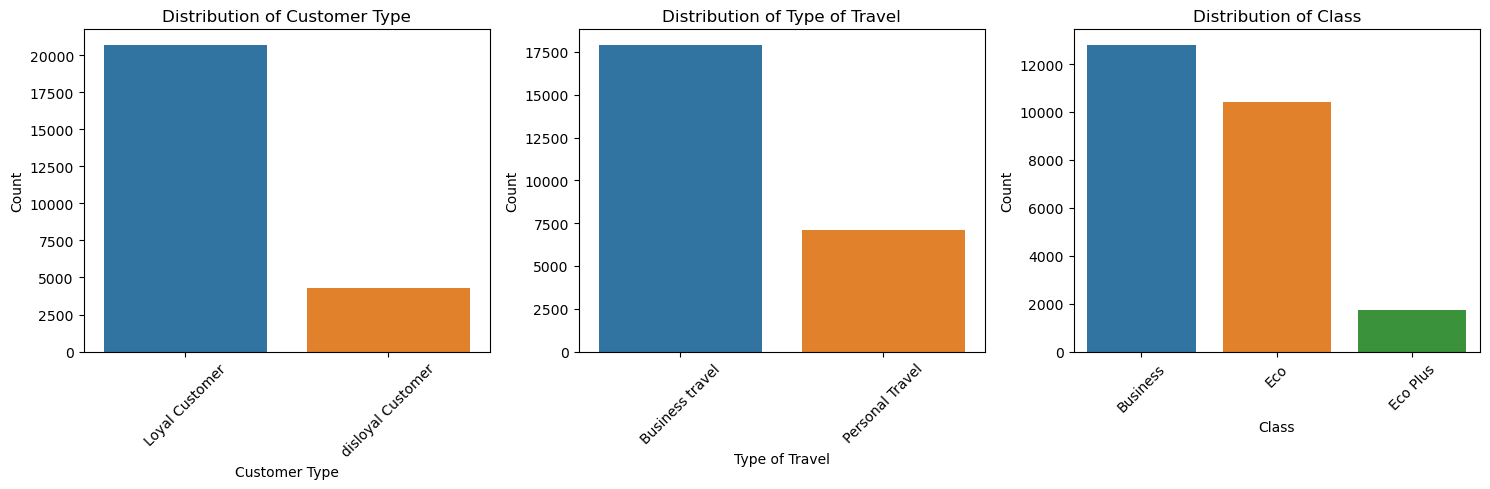

In [5]:
# TODO: Plot Distributions for Numerical Features
# Identify and separate numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

num_numerical = len(numerical_columns)
num_cols = 3
num_rows = (num_numerical + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))


axes = axes.flatten()

for idx, column in enumerate(numerical_columns):
    sns.histplot(df[column], kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {column}')
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel('Frequency')



plt.tight_layout()
plt.show()

# TODO: Visualize Categorical Features
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns[categorical_columns != 'satisfaction']

num_categorical = len(categorical_columns)
num_cols = 3
num_rows = (num_categorical + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

axes = axes.flatten()

for idx, column in enumerate(categorical_columns):
    sns.countplot(x=df[column], ax=axes[idx])
    axes[idx].set_title(f'Distribution of {column}')
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()


# Pre-processing (15 pint)
In this section, we perform some pre-processing to make the data ready for models.

## Task 1: Handling Missing Values (2 point)
In this task, we will handle missing values by [dropping](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) records that contain missing values.

In [6]:
# TODO: Remove any rows in the dataset that contain missing values
df_cleaned = df.dropna()

# Verify if there are any missing values left
print("Number of missing values after cleaning:")
print(df_cleaned.isnull().sum().sum())

Number of missing values after cleaning:
0


## Task 2: Converting Categorical Variables to Numeric (7 point)
We will use [one-hot encoding](https://www.kdnuggets.com/2023/07/pandas-onehot-encode-data.html) to convert categorical variables into a format that can be provided to ML algorithms. Also convert the categorical target variable 'satisfaction' into numeric format, where 'satisfied' is mapped to 1 and 'neutral or dissatisfied' is mapped to 0.

In [7]:
# TODO: Apply one-hot encoding to convert categorical variables into a numeric format suitable for machine learning models.
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns[categorical_columns != 'satisfaction']

df_encoded = pd.get_dummies(df_cleaned, columns=categorical_columns)

df_encoded['satisfaction'] = df_encoded['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

print("Data types after encoding:")
print(df_encoded.dtypes)

print("First few rows of the encoded dataframe:")
print(df_encoded.head())

Data types after encoding:
Flight Distance                    int64
Inflight wifi service              int64
Ease of Online booking             int64
Online boarding                    int64
Seat comfort                       int64
Inflight entertainment             int64
satisfaction                       int64
Customer Type_Loyal Customer        bool
Customer Type_disloyal Customer     bool
Type of Travel_Business travel      bool
Type of Travel_Personal Travel      bool
Class_Business                      bool
Class_Eco                           bool
Class_Eco Plus                      bool
dtype: object
First few rows of the encoded dataframe:
   Flight Distance  Inflight wifi service  Ease of Online booking  \
0             1727                      1                       1   
1             1546                      3                       3   
2             1086                      5                       5   
3             2644                      2                       5   

## Task 3: Splitting the Data into Training and Test Sets(6 point)
Finally, [split your data](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) into training and test sets. This is a critical step for training and evaluating the performance of your models.

In [8]:
# TODO: Separate features and the target variable. Ensure all features are in an integer format.
X = df_encoded.drop('satisfaction', axis=1)  # Features
Y = df_encoded['satisfaction']  # Target variable

# Ensure all features are in the correct format (integer or float)
X = X.astype(int)

# TODO: Split the dataset into training and testing sets using an 80-20 split.
X_train, X_test, Y_train, Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 42)

# TODO: Print the shapes of the training and testing datasets to verify the split.
print("Training set shape:" , X_train.shape , Y_train.shape)
print("Testing set shape:" , X_test.shape , Y_test.shape)

Training set shape: (20000, 13) (20000,)
Testing set shape: (5000, 13) (5000,)


<font size=3>
Now that our data is prepared and we have separate training and testing datasets, along with the necessary preprocessing completed, we are ready to move on to the model building and training phase. We will start with the Naive Bayes classifier, which is our first model in this series of experiments.

# Naive Bayes Classifier (25 point)

## Task 1: Implement Naive Bayes Classifier from Scratch (15 point)
In this task, you will implement the [Naive Bayes Classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) from scratch. This will involve calculating the prior probabilities for each class, the likelihood of the data given the class, and using these to calculate the posterior probabilities for the prediction.


[This video](https://www.youtube.com/watch?v=O2L2Uv9pdDA) will be helpful too.
Especially [this model](https://www.youtube.com/watch?v=H3EjCKtlVog).


In [9]:
class NaiveBayesClassifier:
    def __init__(self):
        self.means = []
        self.variances = []
        self.priors = []
        self.classes = None

    def fit(self, X, Y):
        self.classes = np.unique(Y)
        for c in self.classes:
            X_c = X[Y == c]
            self.means.append(np.mean(X_c , axis=0))
            self.variances.append(np.var(X_c , axis=0))
            self.priors.append(X_c.shape[0] / X.shape[0])

    def gaussian_pdf(self , class_idx , x):
        p = np.pi
        mean = self.means[class_idx]
        var = self.variances[class_idx]
        n = np.exp(- (x - mean) ** 2 / (2 * var))
        d = np.sqrt(2 * p * var)
        return (n / d)

    def predict(self , X):
        Y_pred = [self._predict(x) for x in X]
        return np.array(Y_pred)
    

    def _predict(self, x):
        probabilities = []
        for c in self.classes:
            prior = np.log(self.priors[c])
            count = np.sum(np.log(self.gaussian_pdf(c, x)))
            probability = prior + count
            probabilities.append(probability)
        return self.classes[np.argmax(probabilities)]

## Task 2: Train Naive Bayes Model from Scratch (2 point)
Instantiate the NaiveBayesClassifier class and fit it to the training data.

In [10]:
naiive = NaiveBayesClassifier()
naiive.fit(X_train.values , Y_train.values)

train_prediction = naiive.predict(X_train.values)
test_prediction = naiive.predict(X_test.values)

## Task 3: Train Naive Bayes Model Using scikit-learn (5 point)
Utilize the [Naive Bayes class from scikit-learn](https://scikit-learn.org/stable/modules/naive_bayes.html) to train a Naive Bayes model on the same dataset.

In [11]:
from sklearn.naive_bayes import GaussianNB

naiive_sci = GaussianNB()
naiive_sci.fit(X_train, Y_train)

train_prediction_sci = naiive_sci.predict(X_train)
test_prediction_sci = naiive_sci.predict(X_test)

## Task 4: Evaluate and Compare Both Models (3 point)
Evaluate both the custom-built Naive Bayes model and the scikit-learn model. The primary metric for comparison is accuracy, which is sufficient for earning full points on this task. Optionally, you can also use a [confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html) to further analyze and compare their performance in terms of [accuracy, precision, recall, and F1 score](https://www.labelf.ai/blog/what-is-accuracy-precision-recall-and-f1-score).
Please note that while the main focus is on comparing the accuracy, the output you see in this cell will be a confusion matrix if you choose to include additional metrics. This is encouraged as it provides a more comprehensive view of model performance but is not mandatory for meeting the basic requirements of the task.

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


accuracy_train = accuracy_score(Y_train , train_prediction)
accuracy_test = accuracy_score(Y_test , test_prediction)
accuracy_train_sci = accuracy_score(Y_train , train_prediction_sci)
accuracy_test_sci = accuracy_score(Y_test , test_prediction_sci)

# first we will show their accuracies

print("calculating the accuracy for the naiive bayes class:")
print("TRAINING:" , accuracy_train)
print("TESTING:" , accuracy_test , "\n")

print("calculating the accuracy for the naiive_sci bayes class:")
print("TRAINING:" , accuracy_train_sci)
print("TESTING:" , accuracy_test_sci , "\n")

# then we will show the confustion matrix
# the numbers on the main diagonal are the correct predictions:
matrix = confusion_matrix(Y_test , test_prediction)
print("confusion matrix for the naiive bayes calss:")
print(matrix , "\n")
matrix = confusion_matrix(Y_test, test_prediction_sci)
print("Confusion Matrix for Scikit-learn Gaussian Naive Bayes Classifier:")
print(matrix , "\n")

# finally take a look at the classifications:
report_naiive = classification_report(Y_test, test_prediction)
print("classification report for the naiive bayes class:")
print(report_naiive , "\n")
report_naiive_sci = classification_report(Y_test, test_prediction_sci)
print("Classification Report for Scikit-learn Gaussian Naive Bayes Classifier:")
print(report_naiive_sci)



calculating the accuracy for the naiive bayes class:
TRAINING: 0.8322
TESTING: 0.8306 

calculating the accuracy for the naiive_sci bayes class:
TRAINING: 0.8324
TESTING: 0.8308 

confusion matrix for the naiive bayes calss:
[[2049  435]
 [ 412 2104]] 

Confusion Matrix for Scikit-learn Gaussian Naive Bayes Classifier:
[[2048  436]
 [ 410 2106]] 

classification report for the naiive bayes class:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      2484
           1       0.83      0.84      0.83      2516

    accuracy                           0.83      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       0.83      0.83      0.83      5000
 

Classification Report for Scikit-learn Gaussian Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      2484
           1       0.83      0.84      0.83      2516

    accuracy                       

# Decision tree Classifier (25 point)

## Task 1: Implement Decision Tree Classifier from Scratch (15 point)
In this task, you are to implement a [Decision Tree Classifier](https://en.wikipedia.org/wiki/Decision_tree) entirely from scratch. The core framework of the classifier has been outlined for you, including several helper methods that you might find useful. These methods are intended to guide your implementation and provide a structured way to approach the problem.You are not strictly bound to the provided private methods (`_compute_entropy`, `_split_data`, etc.). If you find a more efficient or clearer way to implement these functionalities, you are encouraged to adjust the methods accordingly.

[This video](https://www.youtube.com/watch?v=_L39rN6gz7Y) will be helpful too.

In [14]:
class DecisionTreeClassifier:
    def __init__(self, max_depth = None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self , X , Y):
        X = X.values
        Y = Y.values
        self.tree = self._build_tree(X , Y , 0)

    def predict(self , X):
        X = X.values
        return np.array([self._predict_sample(x , self.tree) for x in X])

    def _compute_entropy(self , Y):
        unique_labels , counts = np.unique(Y , return_counts = True)
        probabilities = counts / len(Y)
        entropy = - np.sum(probabilities * np.log2(probabilities))
        return entropy

    def _split_data(self , X , Y , feature_index , threshold):
        left_tree = X[: , feature_index] <= threshold
        right_tree = ~ left_tree
        return X[left_tree] , X[right_tree] , Y[left_tree] , Y[right_tree]

    def _find_best_split(self , X , Y):
        
        feature_index = None
        threshold = None
        IG = float('-inf')
        current_entropy = self._compute_entropy(Y)

        for current_feature_index in range(X.shape[1]):
            
            values = np.unique(X[: , current_feature_index])
            for value in values:
                X_left , X_right , Y_left , Y_right = self._split_data(X , Y , current_feature_index , value)
                if (len(Y_left) != 0 and len(Y_right) != 0):
                    left_entropy = self._compute_entropy(Y_left)
                    right_entropy = self._compute_entropy(Y_right)
                    p_left = len(Y_left) / len(Y)
                    p_right = len(Y_right) / len(Y)
                    weighted_entropy = p_left * left_entropy + p_right * right_entropy
                    current_IG = current_entropy - weighted_entropy
                    if (current_IG > IG):
                        IG = current_IG
                        feature_index = current_feature_index
                        threshold = value

        return feature_index , threshold

    def _build_tree(self , X , Y , depth):
        n_samples, n_features = X.shape
        unique_labels = np.unique(Y)

        if (len(unique_labels) == 1):
            return unique_labels[0]
        if self.max_depth is not None and depth >= self.max_depth:
            return np.bincount(Y).argmax()

        feature_index , threshold = self._find_best_split(X , Y)
        X_left , X_right , Y_left , Y_right = self._split_data(X , Y , feature_index , threshold)
        left_subtree = self._build_tree(X_left , Y_left , depth + 1)
        right_subtree = self._build_tree(X_right , Y_right , depth + 1)

        return {
            'feature_index': feature_index,
            'threshold': threshold,
            'left': left_subtree,
            'right': right_subtree
        }

    def _predict_sample(self , x , tree):
        
        if not isinstance(tree , dict):
            return tree
        feature_index = tree['feature_index']
        threshold = tree['threshold']
        if (x[feature_index] <= threshold):
            return self._predict_sample(x , tree['left'])
        else:
            return self._predict_sample(x , tree['right'])


## Task 2: Train Decision Tree Model from Scratch (2 point)
Instantiate the DecisionTree class and fit it to the training data.

In [15]:
decision_tree = DecisionTreeClassifier(max_depth = 5)
decision_tree.fit(X_train , Y_train)

## Task 3: Train Decision Tree Model Using scikit-learn (5 point)
Utilize the [Decision Tree class from scikit-learn](https://scikit-learn.org/stable/modules/tree.html) to train a Decision Tree model on the same dataset.

In [16]:
from sklearn.tree import DecisionTreeClassifier as SklearnDecisionTreeClassifier

sklearn_dt = SklearnDecisionTreeClassifier(max_depth = 5 , random_state = 42)
sklearn_dt.fit(X_train , Y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

## Task 4: Evaluate and Compare Both Models (3 points)

Evaluate both the custom-built Decision Tree model and the scikit-learn model. The primary metric for comparison is accuracy, which is sufficient for earning full points on this task. Optionally, you can also use a confusion matrix to further analyze and compare their performance in terms of accuracy, precision, recall, and F1 score.
Please note that while the main focus is on comparing the accuracy, the output you see in this cell will be a confusion matrix if you choose to include additional metrics. This is encouraged as it provides a more comprehensive view of model performance but is not mandatory for meeting the basic requirements of the task.


In [17]:
# Predict and evaluate the custom Decision Tree model
prediction = decision_tree.predict(X_test)

print("Custom Decision Tree Classifier")
print("Accuracy:", accuracy_score(Y_test , prediction))
print("Confusion Matrix:\n", confusion_matrix(Y_test , prediction))
print("Classification Report:\n", classification_report(Y_test , prediction))


prediction = sklearn_dt.predict(X_test)

print("Custom Decision Tree Classifier")
print("Accuracy:", accuracy_score(Y_test , prediction))
print("Confusion Matrix:\n", confusion_matrix(Y_test , prediction))
print("Classification Report:\n", classification_report(Y_test , prediction))

Custom Decision Tree Classifier
Accuracy: 0.9046
Confusion Matrix:
 [[2290  194]
 [ 283 2233]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91      2484
           1       0.92      0.89      0.90      2516

    accuracy                           0.90      5000
   macro avg       0.91      0.90      0.90      5000
weighted avg       0.91      0.90      0.90      5000

Custom Decision Tree Classifier
Accuracy: 0.9042
Confusion Matrix:
 [[2310  174]
 [ 305 2211]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      2484
           1       0.93      0.88      0.90      2516

    accuracy                           0.90      5000
   macro avg       0.91      0.90      0.90      5000
weighted avg       0.91      0.90      0.90      5000

